In [94]:
import pandas as pd
from datetime import datetime
import numpy as np
import os
import csv
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Load the dataset GENERAL_STATS
general_stats = pd.read_csv("C:/Users/Tie12/DataManagement/GENERAL_STATS.csv")

In [3]:
# Load the dataset EMA_DATA
ema_dataset = pd.read_csv("C:/Users/Tie12/DataManagement/EMA_data.csv")

Part 1: Analysis with GENERAL_STATS Dataset

In this part of the analysis, we aim to examine the home advantage in football matches. We will explore whether teams tend to perform better when playing at home compared to when they are playing away. This will involve looking at factors such as win rates, goals scored and other performance metrics to determine if home teams have a statistically significant advantage in match outcomes.

In [6]:
# Ensure the Season column is treated as strings
general_stats['Season'] = general_stats['Season'].astype(str)

# Apply the transformation to format the season
general_stats['Season'] = general_stats['Season'].str.replace(
    r'^(\d{4})/(\d{4})$', 
    lambda m: f"{m.group(1)[-2:]}/{m.group(2)[-2:]}", 
    regex=True
)

In [96]:
# Most common full-time result
most_common_result = general_stats['FTR'].mode()[0]
print(f"Most Common Full-Time Result: {most_common_result}")

Most Common Full-Time Result: H


The most common full-time result is "H", indicating that ,on average, home teams are more likely to secure a victory compared to away teams. This result reinforces the idea of a home advantage in football, where playing in familiar surroundings might provide teams with a greater chance of success.

<Figure size 1200x600 with 0 Axes>

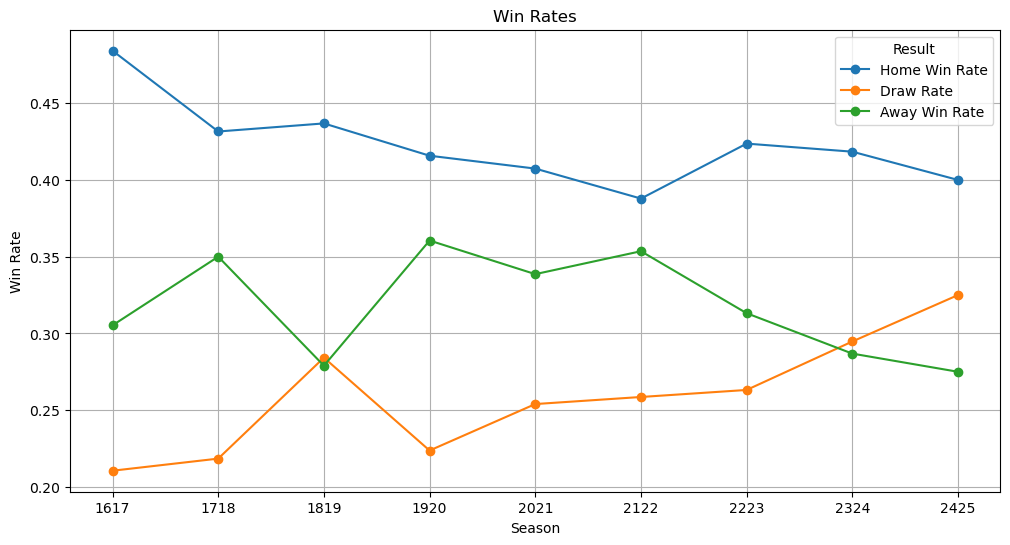

In [131]:
# Calculate win rates for Home win, Draw, and Away win by season
home_advantage = general_stats.groupby('Season')['FTR'].value_counts(normalize=True).unstack()
home_advantage = home_advantage.rename(columns={'H': 'Home Win Rate', 'D': 'Draw Rate', 'A': 'Away Win Rate'})

# Plot win rates over seasons
plt.figure(figsize=(12, 6))
home_advantage[['Home Win Rate', 'Draw Rate', 'Away Win Rate']].plot(marker='o', figsize=(12, 6))
plt.title('Win Rates')
plt.xlabel('Season')
plt.ylabel('Win Rate')
plt.legend(title='Result')
plt.grid(True)
plt.savefig('Win rates.pdf', dpi=300, bbox_inches='tight')
plt.show()

This line plot tracks the win rates of home wins, away wins, and draws across seasons. Home win rates remain consistently higher than away wins and draws, reinforcing the home-field advantage. Draw rates are relatively stable but occasionally intersect with away win rates.

In [134]:
# Calculate home advantage for each club (percentage of home wins)
home_advantage_clubs = general_stats[general_stats['FTR'] == 'H'].groupby('HomeTeam').size() / general_stats.groupby('HomeTeam').size()
home_advantage_clubs = home_advantage_clubs.sort_values(ascending=False).head(10)
print("Top 10 Clubs with Highest Home Advantage:")
print(home_advantage_clubs)

Top 10 Clubs with Highest Home Advantage:
HomeTeam
Juventus      0.732484
Inter         0.679487
Roma          0.621795
Napoli        0.621795
Milan         0.583333
Lazio         0.583333
Atalanta      0.541935
Fiorentina    0.435897
Bologna       0.397436
Sampdoria     0.390977
dtype: float64


The top 10 clubs with the highest home advantage show a clear trend of stronger performance at home. Teams like Juventus, Inter and Roma have significant home advantages, reflecting their ability to secure better results when playing in familiar surroundings. This further supports the idea that home advantage plays a crucial role in determining match outcomes.

        Home Points  Away Points  Draw Points
Season                                       
1617            552          348           80
1718            492          399           83
1819            498          318          108
1920            474          411           85
2021            462          384           96
2122            441          402           98
2223            483          357          100
2324            477          327          112
2425             96           66           26


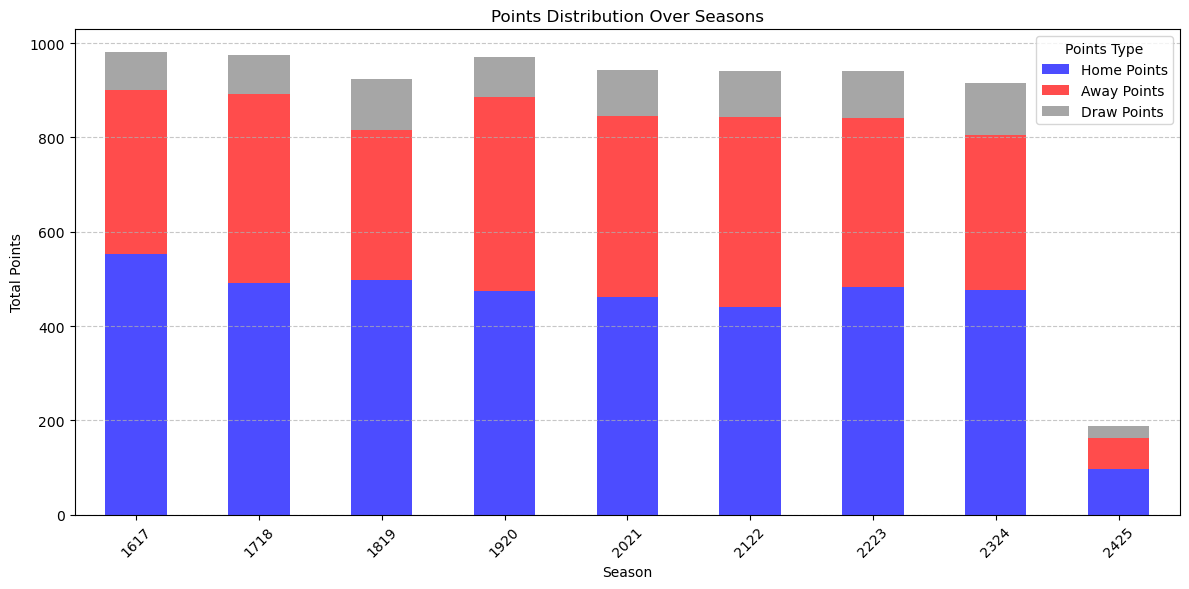

In [137]:
# Points Analysis
home_points = general_stats[general_stats['FTR'] == 'H'].groupby('Season').size() * 3
away_points = general_stats[general_stats['FTR'] == 'A'].groupby('Season').size() * 3
draw_points = general_stats[general_stats['FTR'] == 'D'].groupby('Season').size() * 1
points_by_season = pd.DataFrame({'Home Points': home_points, 'Away Points': away_points, 'Draw Points': draw_points}).fillna(0)
print(points_by_season)

# Plot points by season
points_by_season.plot(kind='bar', stacked=True, figsize=(12, 6), color=['blue', 'red', 'gray'], alpha=0.7)
plt.title('Points Distribution Over Seasons')
plt.xlabel('Season')
plt.ylabel('Total Points')
plt.legend(title='Points Type')
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.savefig('Points Distribution Over Seasons.pdf', dpi=300, bbox_inches='tight')
plt.show()

The data shows the points earned by home teams, away teams and drawn matches across multiple seasons. Home teams consistently earn more points than away teams, highlighting a strong home advantage. The proportions of away and draw points are relatively consistent over seasons.

In [99]:
# Goals analysis
# Average goals per match
avg_home_goals = general_stats['FTHG'].mean()
avg_away_goals = general_stats['FTAG'].mean()
print(f"Average Home Goals: {avg_home_goals}")
print(f"Average Away Goals: {avg_away_goals}")

Average Home Goals: 1.5219762592236123
Average Away Goals: 1.2810394610202118


The analysis shows that home teams score, on average, more goals than away teams, with a difference of approximately 0.24 goals per match.

<Figure size 1200x600 with 0 Axes>

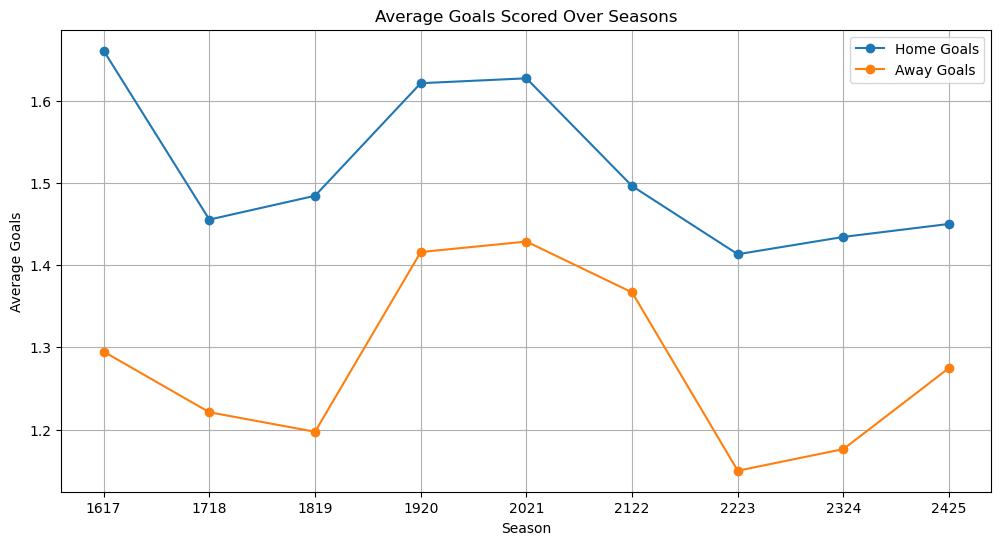

In [101]:
# Average Goals Scored over seasons
goals_by_season = general_stats.groupby('Season')[['FTHG', 'FTAG']].mean()
plt.figure(figsize=(12, 6))
goals_by_season.plot(marker='o', figsize=(12, 6))
plt.title('Average Goals Scored Over Seasons')
plt.xlabel('Season')
plt.ylabel('Average Goals')
plt.legend(['Home Goals', 'Away Goals'])
plt.grid(True)
plt.savefig('Average Goals Scored Over Seasons.pdf', dpi=300, bbox_inches='tight')
plt.show()

Line plot tracks the average goals scored by home and away teams over seasons. Home teams consistently score more goals than away teams. Seasonal fluctuations suggest changes in overall league competitiveness or strategies. This could be a sign of the home advantage, where teams perform better in their familiar environment. Further analysis may be needed to explore other factors contributing to this trend.

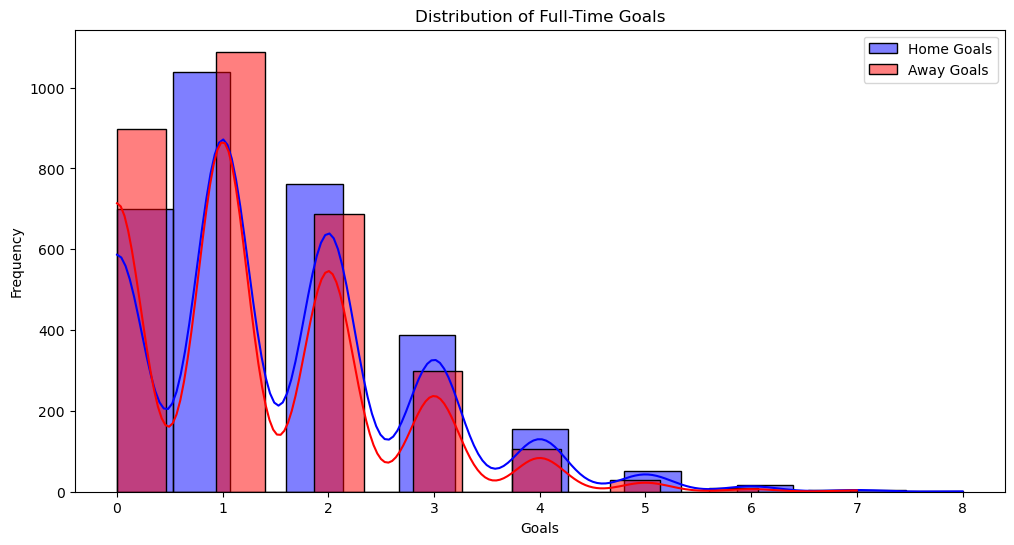

In [110]:
# Distribution of full-time goals for home and away teams
plt.figure(figsize=(12, 6))
sns.histplot(general_stats['FTHG'], kde=True, color='blue', label='Home Goals', bins=15)
sns.histplot(general_stats['FTAG'], kde=True, color='red', label='Away Goals', bins=15)
plt.title('Distribution of Full-Time Goals')
plt.xlabel('Goals')
plt.ylabel('Frequency')
plt.legend()
plt.savefig('Distribution of Full-Time Goals.pdf', dpi=300, bbox_inches='tight')
plt.show()

Using histograms, we visualize the frequency of full-time goals scored by home and away teams. This highlights the most common scoring totals and helps identify any significant differences in scoring behavior. Particularly, this histogram compares the distribution of goals scored by the home and away teams in full-time matches. The trend indicates that home teams generally score more goals than away teams, with a peak at 1-2 goals.

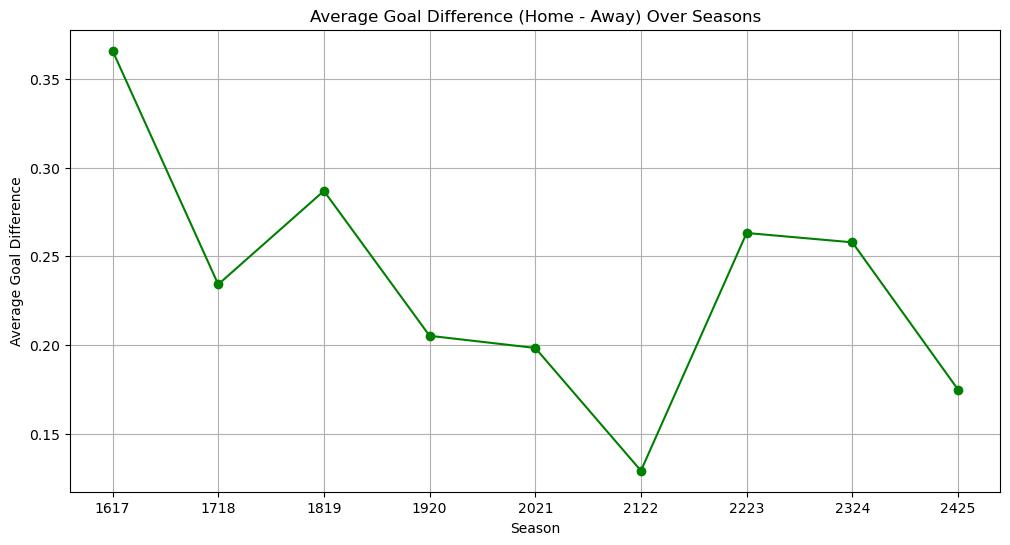

In [117]:
# Goal Difference Analysis
goal_difference = general_stats['FTHG'] - general_stats['FTAG']
general_stats['GoalDifference'] = goal_difference
goal_diff_by_season = general_stats.groupby('Season')['GoalDifference'].mean()

plt.figure(figsize=(12, 6))
goal_diff_by_season.plot(marker='o', color='green')
plt.title('Average Goal Difference (Home - Away) Over Seasons')
plt.xlabel('Season')
plt.ylabel('Average Goal Difference')
plt.grid(True)
plt.savefig('Average Goal Difference (Home - Away) Over Seasons.pdf', dpi=300, bbox_inches='tight')
plt.show()

The line plot displays the average difference between goals scored by home and away teams. Home advantage is reflected in the positive goal differences, though the margin decreases in certain seasons.

In [12]:
# Filter for numeric columns only
numeric_data = general_stats.select_dtypes(include=['float64', 'int64'])

The following analysis explores the relationships between numerical variables in the dataset, such as goals scored, goals conceded and points difference. A heatmap visualization is used to make these relationships easier to interpret, helping identify which variables might strongly influence match outcomes.

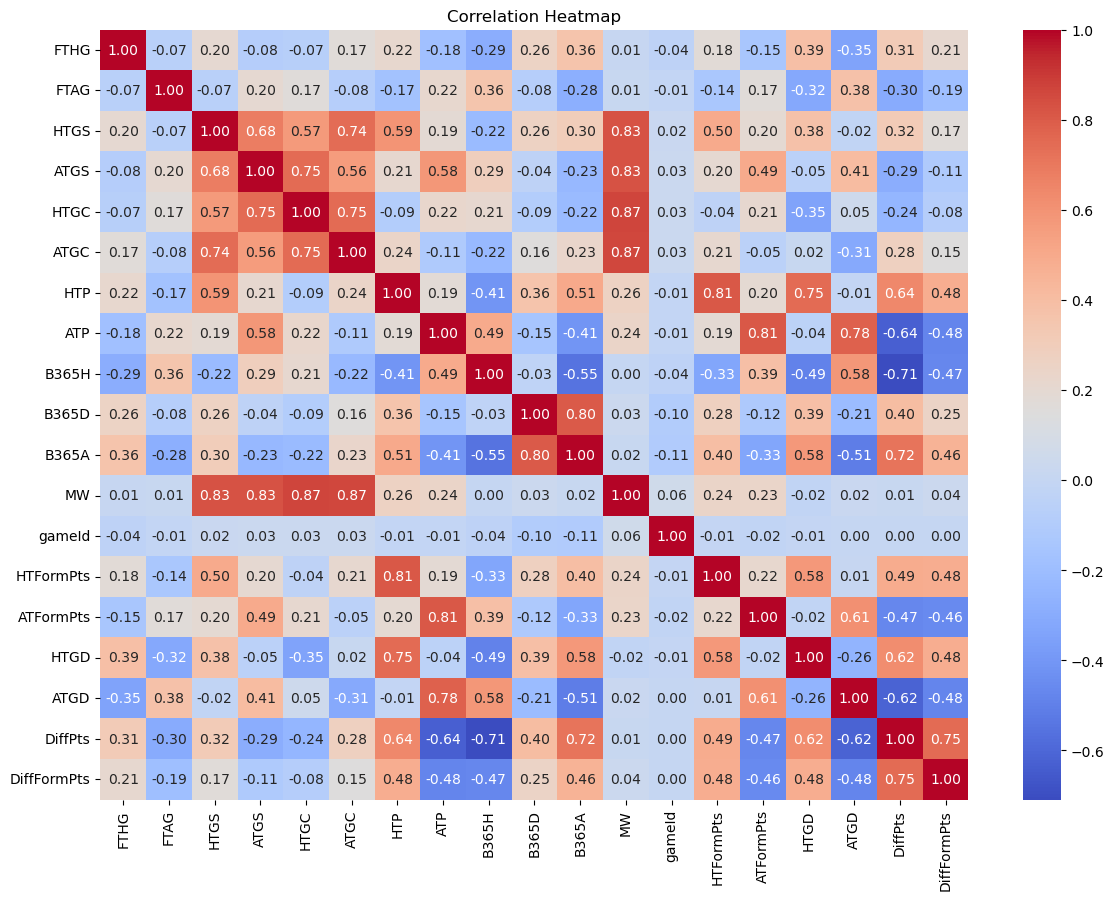

In [105]:
# Correlation matrix
correlation_matrix = numeric_data.corr()

# Correlation heatmap for numerical variables
plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', cbar=True)
plt.title('Correlation Heatmap')
plt.savefig('Correlation Heatmap.pdf', dpi=300, bbox_inches='tight')
plt.show()

This heatmap visualizes the correlation between numerical variables in the dataset (e.g., goals scored, goals conceded, betting odds, etc.). Darker red indicates a stronger positive correlation, while darker blue indicates a stronger negative correlation. Key observations include that home team goals scored (HTGS) and conceded (HTGC) have strong positive correlations with total match outcomes. Betting odds (B365H, B365D, B365A) show correlations with respective match outcomes.

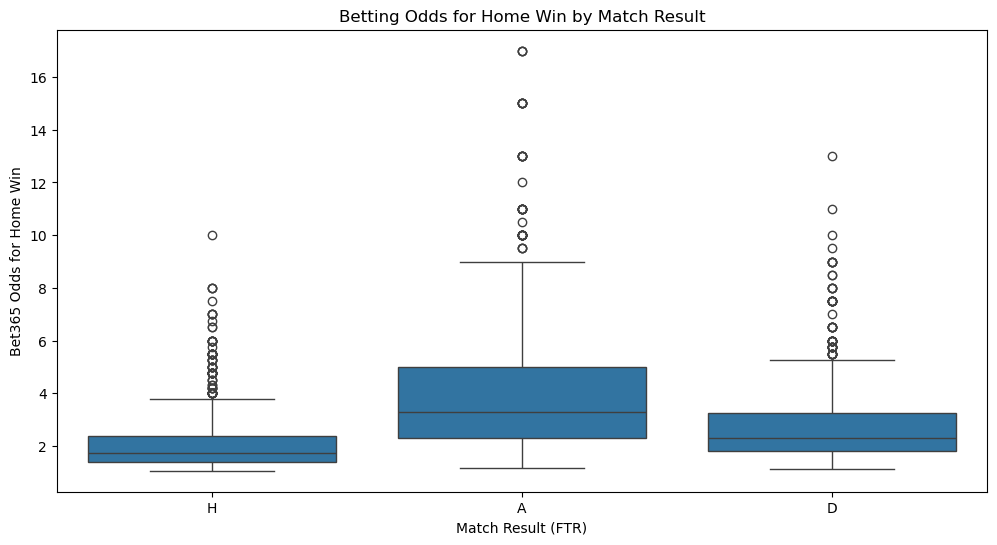

In [18]:
# Betting odds vs. match result
plt.figure(figsize=(12, 6))
sns.boxplot(x='FTR', y='B365H', data=general_stats)
plt.title('Betting Odds for Home Win by Match Result')
plt.xlabel('Match Result (FTR)')
plt.ylabel('Bet365 Odds for Home Win')
plt.savefig('Betting Odds for Home Win by Match Result.pdf', dpi=300, bbox_inches='tight')
plt.show()

We analysed the relationship between betting odds and match outcomes, focusing on odds for home wins. The boxplot shows how odds vary depending on whether the match ends in a home win, draw or away win. This provides insights into how odds align with actual results.
Lower odds generally correspond to a higher likelihood of a home win (H). Draws (D) and away wins (A) are associated with higher odds, suggesting lower probabilities as perceived by bookmakers.

The analysis of the GENERAL_STATS dataset confirms a strong home advantage in football, with home teams consistently achieving higher win rates, scoring more goals and earning more points than away teams. While home advantage remains strong, the trends over seasons suggest that the margin of advantage may fluctuate due to changing league dynamics, tactics or competitiveness. This comprehensive exploration underscores the central role of home-field advantage in shaping football match outcomes.

Part 2: Analysis with EMA_DATASET

In this analysis, we leverage the EMA dataset to explore team performance trends and their evolution across seasons. The focus is on home team performance metrics, including goals scored, goals conceded and key influencing factors such as shots, shots on target and corners. Additionally, league-wide trends for goals and disciplinary actions are examined to provide context on broader patterns in team performances and styles of play.

In [38]:
# Convert seasons into short format (e.g., 16/17)
# Ensure the column is treated as strings
ema_dataset['f_SeasonHome'] = ema_dataset['f_SeasonHome'].astype(str)

# Apply the transformation to format the season
ema_dataset['f_SeasonHome'] = ema_dataset['f_SeasonHome'].str.replace(
    r'^(\d{4})/(\d{4})$', 
    lambda m: f"{m.group(1)[-2:]}/{m.group(2)[-2:]}", 
    regex=True
)

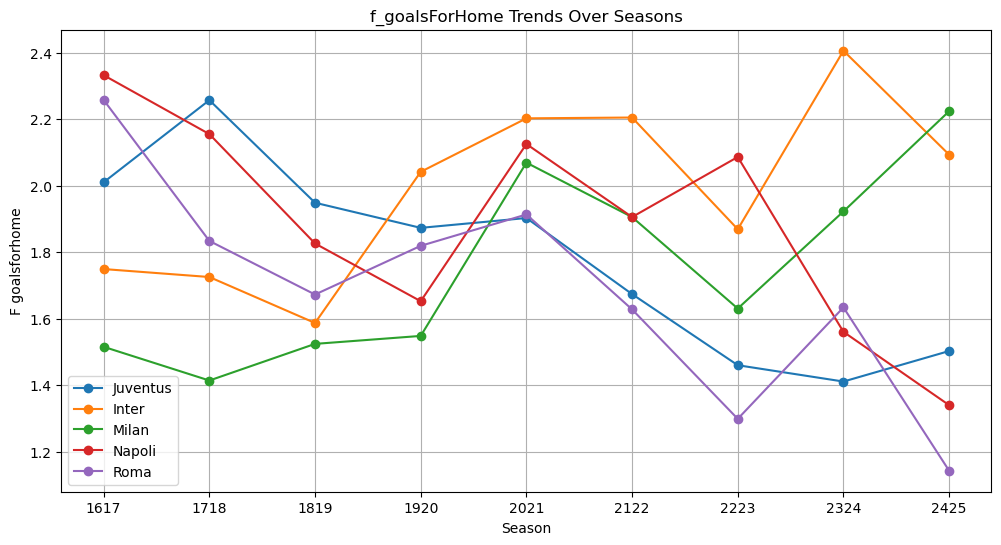

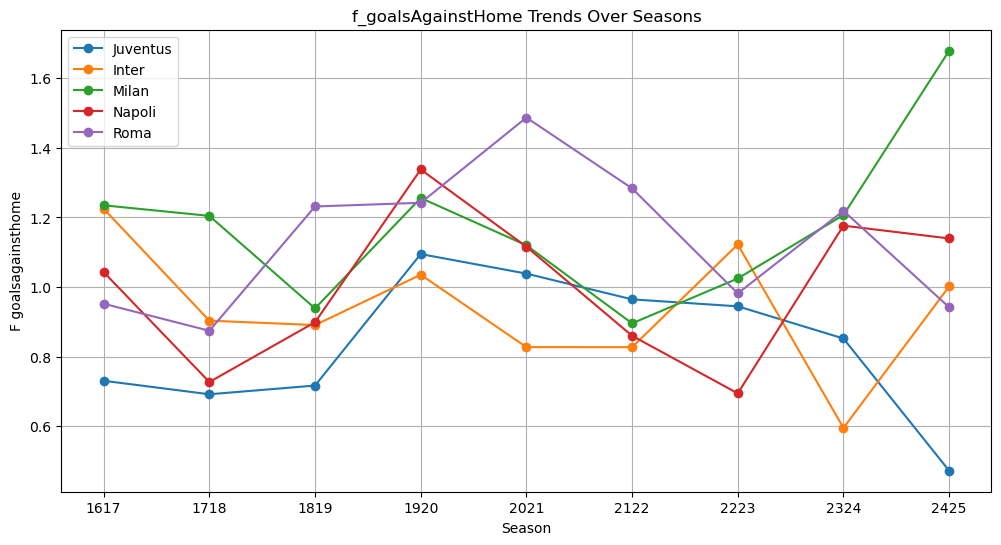

In [39]:
# Trend Analysis Over Seasons
teams = ['Juventus', 'Inter', 'Milan', 'Napoli', 'Roma']
metrics = ['f_goalsForHome', 'f_goalsAgainstHome']

for metric in metrics:
    plt.figure(figsize=(12, 6))
    for team in teams:
        team_data = ema_dataset[ema_dataset['HomeTeam'] == team].groupby('f_SeasonHome')[metric].mean()
        plt.plot(team_data.index, team_data.values, marker='o', label=team)

    plt.title(f'{metric} Trends Over Seasons')
    plt.xlabel('Season')
    plt.ylabel(metric.replace('_', ' ').capitalize())
    plt.legend()
    plt.grid(True)
    plt.savefig(f'{metric} Trends Over Seasons.pdf', dpi=300, bbox_inches='tight')
    plt.show()

Using the Exponential Moving Averages (EMA) dataset, we examine how team performance trends evolve over seasons. This analysis captures progressive or regressive trends for teams, providing insights into whether they are improving or declining.
f_goalsForHome Trends Over Seasons
Line plot tracks the average goals scored by the home team for specific clubs over seasons. Clubs like Napoli and Roma had higher home goal averages in earlier seasons but showed a declining trend over time. Juventus and Inter maintain relatively consistent averages with occasional spikes.
f_goalsAgainstHome Trends Over Seasons shows the average goals conceded by home teams for specific clubs over seasons. Teams like Roma have fluctuating trends with higher averages in certain seasons, while Juventus consistently concedes fewer goals at home.

<Figure size 1400x1000 with 0 Axes>

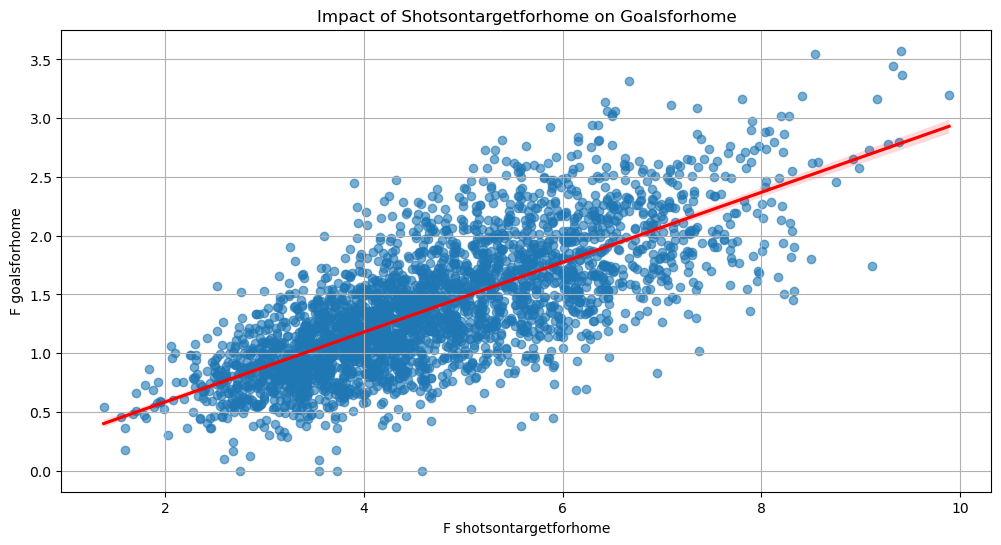

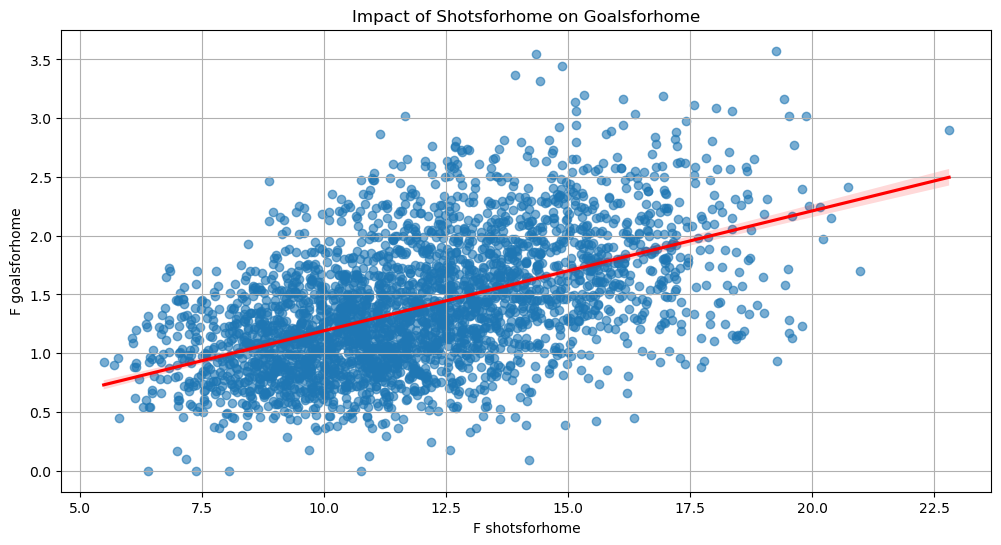

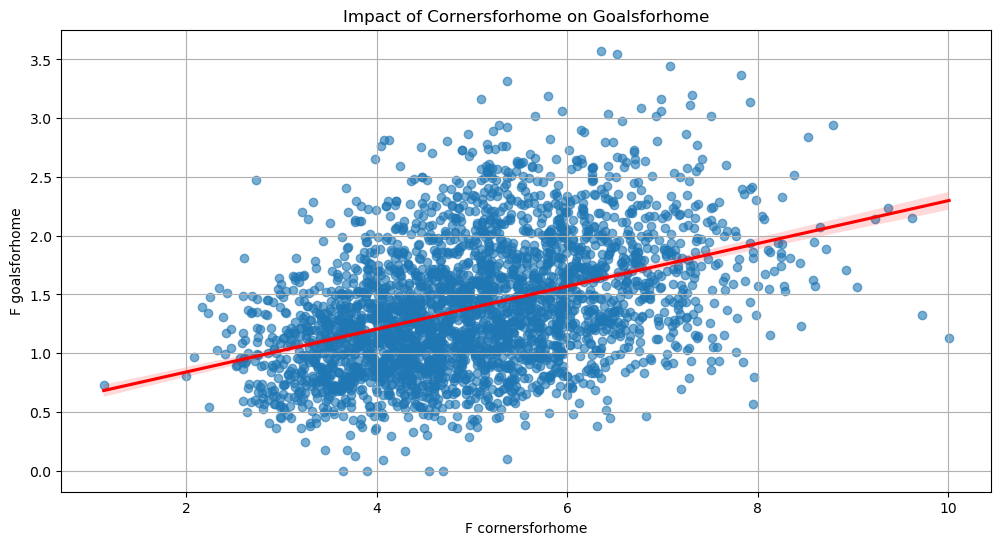

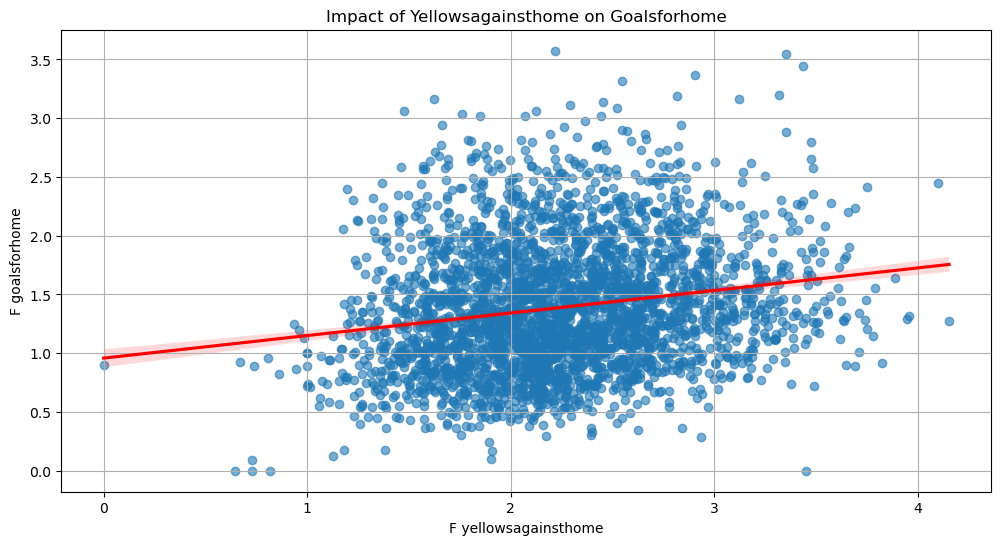

In [43]:
# Impact of Key Metrics
key_metrics = ['f_shotsOnTargetForHome', 'f_shotsForHome', 'f_cornersForHome', 'f_yellowsAgainstHome']
goals = 'f_goalsForHome'

plt.figure(figsize=(14, 10))
for metric in key_metrics:
    plt.figure(figsize=(12, 6))
    sns.regplot(x=metric, y=goals, data=ema_dataset, scatter_kws={'alpha': 0.6}, line_kws={'color': 'red'})
    plt.title(f'Impact of {metric.replace("f_", "").capitalize()} on {goals.replace("f_", "").capitalize()}')
    plt.xlabel(metric.replace('_', ' ').capitalize())
    plt.ylabel(goals.replace('_', ' ').capitalize())
    plt.grid(True)
    filename = f'{metric}_impactof.pdf'
    plt.savefig(filename, dpi=300, bbox_inches='tight')
    plt.show()

We investigate how specific metrics, such as shots, shots on target and fouls, influence overall team performance. This analysis identifies which factors have the strongest impact on match outcomes.
Impact of ShotsForHome on GoalsForHome scatter plot with regression line shows the relationship between shots attempted at home and goals scored at home. A positive correlation suggests that more shots at home generally result in more goals scored. ShotsOnTargetForHome on GoalsForHome analyzes the impact of shots on target at home on goals scored. A strong positive correlation indicates that accuracy (shots on target) significantly influences goals scored at home. YellowsAgainstHome on GoalsForHome evaluates the relationship between yellow cards against the home team and their goals scored. A slight positive trend, but the effect is minimal, indicating that yellow cards against the home team have limited influence on their goal-scoring ability. CornersForHome on GoalsForHome explores the relationship between corners won at home and goals scored. A clear positive correlation suggests that creating corner opportunities leads to more goals for the home team.

<Figure size 1400x1000 with 0 Axes>

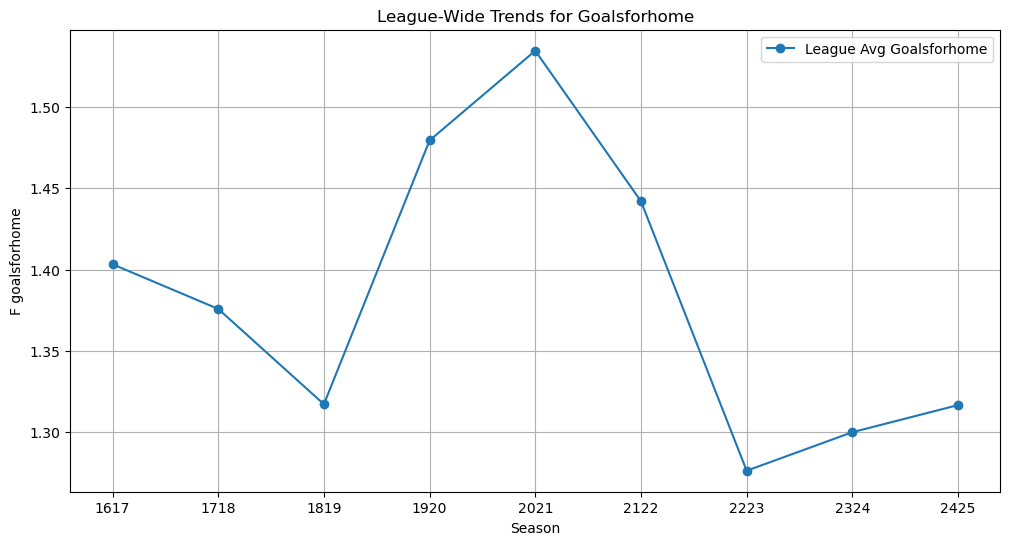

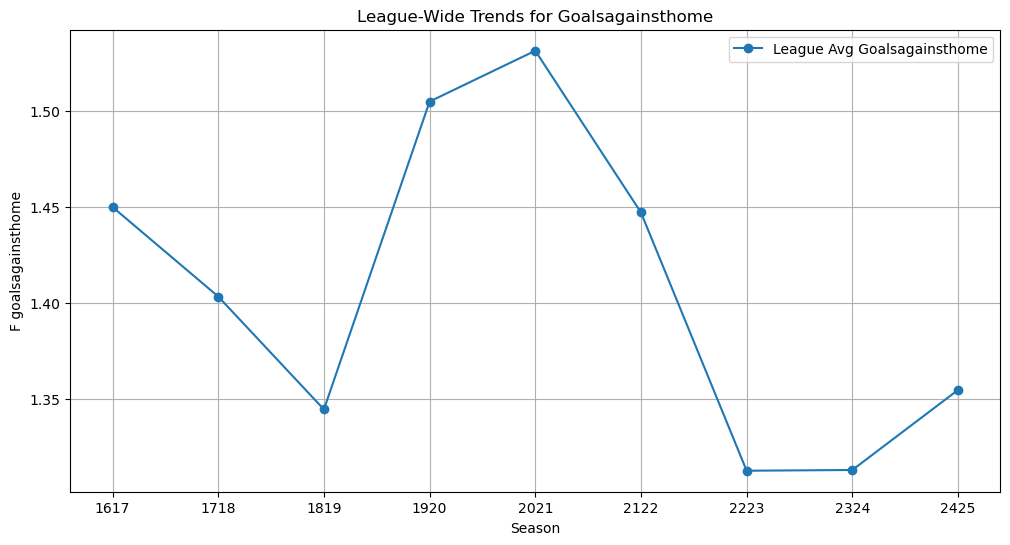

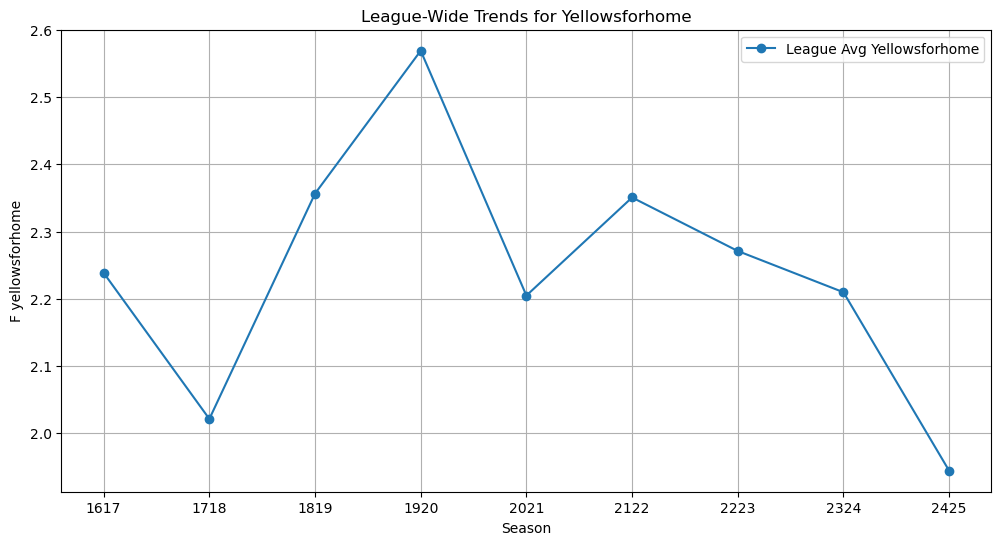

In [45]:
# League Trends
league_metrics = ['f_goalsForHome', 'f_goalsAgainstHome', 'f_yellowsForHome']

plt.figure(figsize=(14, 10))
for metric in league_metrics:
    plt.figure(figsize=(12, 6))
    league_avg = ema_dataset.groupby('f_SeasonHome')[metric].mean()
    plt.plot(league_avg.index, league_avg.values, marker='o', label=f'League Avg {metric.replace("f_", "").capitalize()}')

    plt.title(f'League-Wide Trends for {metric.replace("f_", "").capitalize()}')
    plt.xlabel('Season')
    plt.ylabel(metric.replace('_', ' ').capitalize())
    plt.legend()
    plt.grid(True)
    filename = f'{metric}_Leaguetrends.pdf'
    plt.savefig(filename, dpi=300, bbox_inches='tight')
    plt.show()

League-Wide Trends for GoalsAgainstHome
Line plot shows the league-wide average goals conceded at home across seasons. A general decline in goals conceded at home over seasons suggests improved defensive strategies or a reduction in attacking efficiency by away teams.
League-Wide Trends for GoalsforHome tracks the average goals scored by home teams across the league over seasons. A spike in the 2021 season suggests increased attacking efficiency or reduced defensive quality, followed by a decline in subsequent seasons.
League-Wide Trends for YellowsforHome displays the average number of yellow cards received by home teams across seasons. A peak around the 2020 season indicates an aggressive style of play or stricter refereeing during this time.

Overall, the EMA dataset reveals key insights into home team performance trends. Metrics like shots on target and corners significantly impact goals scored, emphasizing the importance of precision and offensive strategy. League-wide trends highlight improved defensive strategies over time, with fewer goals conceded at home and reduced disciplinary actions in recent seasons, pointing to evolving tactical and disciplinary approaches in football.

Part 3: Analysis of a Single Team: Juventus

In the third part of the analysis, we focus on examining the performance of a single team, demonstrating that our dataset is flexible enough to support detailed, team-specific insights, not just general trends. While previous analyses may have looked at overall patterns across all teams, this section allows us to focus on the performance of one team, evaluating factors such as home and away performance, win rates, goals scored and other relevant metrics. This team-specific analysis helps highlight individual team strengths, weaknesses and trends, offering a more personalized and granular view of the data.

In [50]:
# Filter data for Juventus
juventus_data = ema_dataset[(ema_dataset['HomeTeam'] == 'Juventus') | (ema_dataset['AwayTeam'] == 'Juventus')]

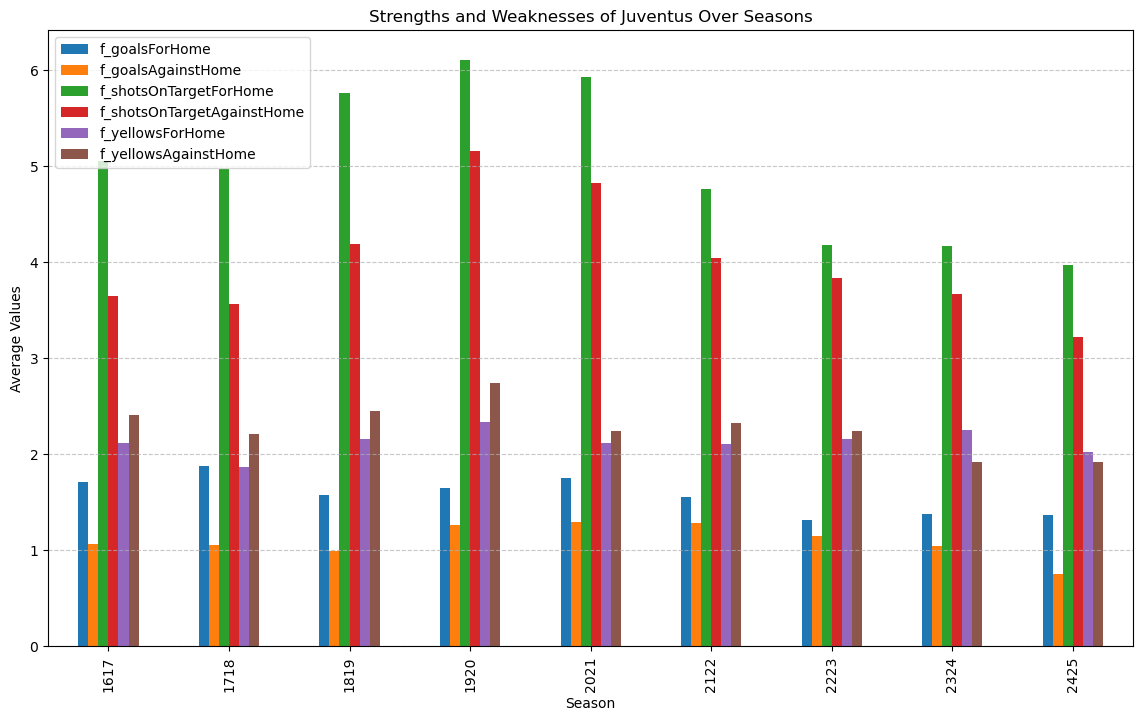

In [127]:
# Strength and Weakness Identification
strengths_weaknesses = juventus_data.groupby('f_SeasonHome').agg({
    'f_goalsForHome': 'mean',
    'f_goalsAgainstHome': 'mean',
    'f_shotsOnTargetForHome': 'mean',
    'f_shotsOnTargetAgainstHome': 'mean',
    'f_yellowsForHome': 'mean',
    'f_yellowsAgainstHome': 'mean'
})

strengths_weaknesses.plot(kind='bar', figsize=(14, 8))
plt.title('Strengths and Weaknesses of Juventus Over Seasons')
plt.xlabel('Season')
plt.ylabel('Average Values')
plt.legend(loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.savefig('Strengths and Weaknesses of Juventus Over Seasons.pdf', dpi=300, bbox_inches='tight')
plt.show()

This bar chart shows metrics like goals scored, goals conceded, shots on target and yellow cards for and against Juventus at home across seasons. Juventus consistently generates a high number of shots on target. Goals conceded and yellow cards against Juventus fluctuate over seasons, highlighting variations in defense and discipline.

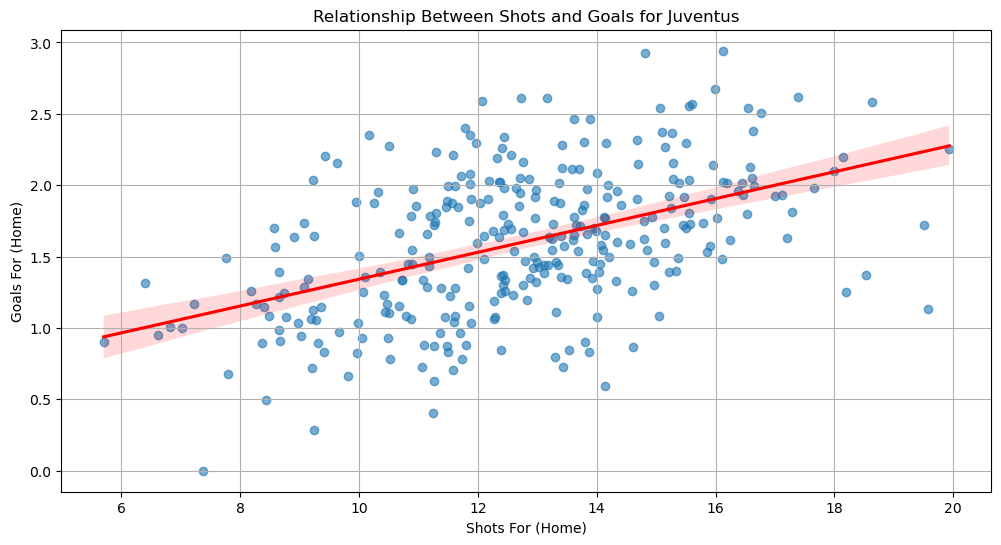

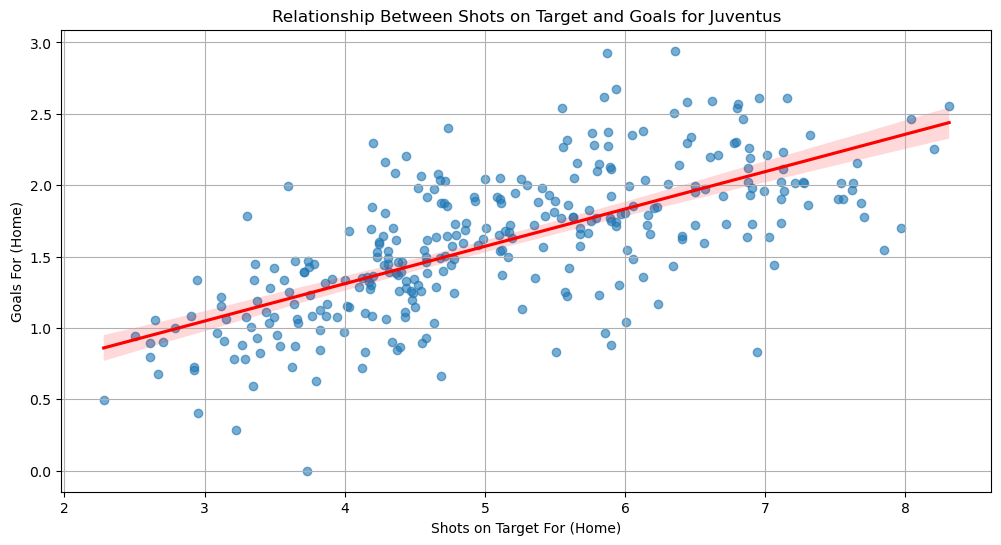

In [54]:
# Key Match Metrics
plt.figure(figsize=(12, 6))
sns.regplot(x='f_shotsForHome', y='f_goalsForHome', data=juventus_data, scatter_kws={'alpha': 0.6}, line_kws={'color': 'red'})
plt.title('Relationship Between Shots and Goals for Juventus')
plt.xlabel('Shots For (Home)')
plt.ylabel('Goals For (Home)')
plt.grid(True)
plt.savefig('Relationship Between Shots and Goals for Juventus.pdf', dpi=300, bbox_inches='tight')
plt.show()

plt.figure(figsize=(12, 6))
sns.regplot(x='f_shotsOnTargetForHome', y='f_goalsForHome', data=juventus_data, scatter_kws={'alpha': 0.6}, line_kws={'color': 'red'})
plt.title('Relationship Between Shots on Target and Goals for Juventus')
plt.xlabel('Shots on Target For (Home)')
plt.ylabel('Goals For (Home)')
plt.grid(True)
plt.savefig('Relationship Between Shots on Target and Goals for Juventu.pdf', dpi=300, bbox_inches='tight')
plt.show()

Relationship Between Shots and Goals for Juventus
Scatter plot with regression line explores the correlation between shots attempted at home and goals scored. A positive trend shows that more shots lead to more goals, emphasizing the importance of creating scoring opportunities.
Relationship Between Shots on Target and Goals examines the relationship between shots on target and goals scored. A stronger positive correlation compared to general shots highlights the importance of shooting accuracy.

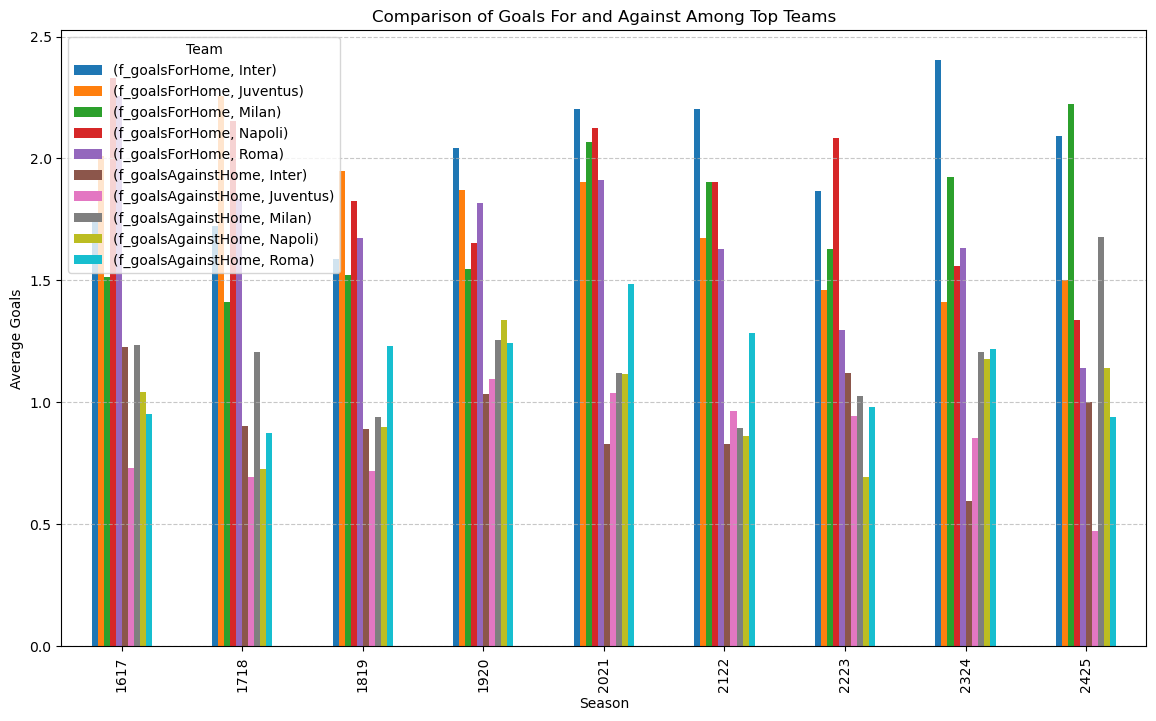

In [58]:
# Comparison with other top teams
top_teams = ['Juventus', 'Inter', 'Milan', 'Napoli', 'Roma']
comparison_metrics = ['f_goalsForHome', 'f_goalsAgainstHome']
comparison_data = ema_dataset[ema_dataset['HomeTeam'].isin(top_teams)].groupby(['f_SeasonHome', 'HomeTeam'])[comparison_metrics].mean().unstack()

comparison_data.plot(kind='bar', figsize=(14, 8))
plt.title('Comparison of Goals For and Against Among Top Teams')
plt.xlabel('Season')
plt.ylabel('Average Goals')
plt.legend(title='Team', loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.savefig('Comparison of Goals For and Against Among Top Teams.pdf', dpi=300, bbox_inches='tight')
plt.show()

This bar chart compares goals scored and conceded at home for top teams (e.g., Juventus, Inter, Milan, etc.) across seasons. Teams like Juventus and Napoli consistently score more goals at home, while defensive performances vary across seasons.

Overall, the analysis of Juventus' performance provides valuable insights into the team's strengths and areas of variability. Juventus consistently excels in creating scoring opportunities, as seen in their high number of shots on target and the strong correlation between shots on target and goals scored. Their defensive performance and discipline, however, show fluctuations across seasons, as reflected in varying goals conceded and yellow cards against them. Compared to other top teams, Juventus remains a strong contender with consistently higher goals scored at home, reinforcing their competitive edge in offensive play.

Conclusion

This comprehensive data analysis reveals a strong home advantage in football, with home teams consistently outperforming away teams in goals scored, win rates and overall points. League-wide trends show fluctuations in performance metrics over seasons, influenced by changes in team strategies, league competitiveness, and external factors. Team-specific insights, like those of Juventus, highlight how individual clubs maintain competitive strengths, such as offensive efficiency and defensive stability, while facing seasonal variability. The analysis underscores the importance of examining both macro-level patterns and team-specific trends to gain deeper insights into football performance dynamics.